<a href="https://colab.research.google.com/github/Sathyakumarnsk/action_classifier/blob/master/vanilla_rnn_trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%tensorflow_version 1.x
import json
import numpy as np
#from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import regularizers
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU

TensorFlow 1.x selected.


Using TensorFlow backend.


In [6]:
#Loading in data
data_path = "./data_humans.json"
#Load data
with open(data_path, "r") as fp:
    data = json.load(fp)


In [7]:
# data.keys()
labels=data['metadata']['all labels in loaded order']
# data['metadata'].keys()
#data['dataperclass'].keys()

In [8]:
X=list(); Y=list()
C_x=list();C_y=list()
for i,c in enumerate(labels):
  print(c)
  skel_class=data['dataperclass'][c]['skelsinfo_list']
  #print(np.array(skel_class))
  C_x.append(skel_class)
  print(np.array(C_x).shape)
  label_class=data['dataperclass'][c]['label_list']
  C_y.append(label_class)
  #print(len(C_y))
  X.extend(skel_class)
  Y.extend(label_class)

drink
(1, 1000, 24)
follow
(2, 1000, 24)
pour
(3, 1000, 24)
pp
(4, 1000, 24)
stand
(5, 1000, 24)
stop
(6, 1000, 24)
wave
(7, 1000, 24)


In [9]:
print(np.array(X).shape)
print(np.array(Y).shape)

(7000, 24)
(7000,)


In [10]:
encoder_Y = to_categorical(Y)
print(Y[0], ": ", encoder_Y[0])
print(Y[50], ": ", encoder_Y[50])
print(Y[100], ": ", encoder_Y[100])
print(Y[150], ": ", encoder_Y[150])
print(Y[1000], ": ", encoder_Y[1000])
print(Y[1500], ": ", encoder_Y[1500])
print(Y[2000], ": ", encoder_Y[2000])
print(Y[2500], ": ", encoder_Y[2500])

0 :  [1. 0. 0. 0. 0. 0. 0.]
0 :  [1. 0. 0. 0. 0. 0. 0.]
0 :  [1. 0. 0. 0. 0. 0. 0.]
0 :  [1. 0. 0. 0. 0. 0. 0.]
1 :  [0. 1. 0. 0. 0. 0. 0.]
1 :  [0. 1. 0. 0. 0. 0. 0.]
2 :  [0. 0. 1. 0. 0. 0. 0.]
2 :  [0. 0. 1. 0. 0. 0. 0.]


In [11]:
import numpy as np
def train_test_split(X_data,Y_data,val=0.2,test=0.1):
    X_data=np.array(X_data);Y_data=np.array(Y_data)
    # create random train/test split
    indices = list(range(X_data.shape[0]))
    train_split=1.0-(val+test)
    num_training_indices = int(train_split * X_data.shape[0])
    num_valid_indices = int(val * X_data.shape[0])
    #num_test_indices = int(train_split * X_data.shape[0])
    np.random.shuffle(indices)
    train_indices = indices[:num_training_indices]
    valid_indices=indices[num_training_indices:num_training_indices+num_valid_indices]
    test_indices = indices[num_training_indices+num_valid_indices:]

    # split the actual data
    X_data_train, X_data_val, X_data_test = X_data[train_indices], X_data[valid_indices], X_data[test_indices]
    Y_data_train, Y_data_val ,Y_data_test = Y_data[train_indices], Y_data[valid_indices], Y_data[test_indices]
    return (X_data_train, X_data_val, X_data_test, Y_data_train, Y_data_val, Y_data_test)


In [12]:
# from tensorflow.keras.utils import normalize
# #from keras.preprocessing import timeseries_dataset_from_array
# X=normalize(X)

In [13]:
def batcher(l,y,n=10):
  batches=[]
  labels_b=[]
  for i in range(0,len(l),1):
    if (i<len(l)-n):
      batches.append(l[i:n+i])
      labels_b.append(y[i])
  return batches,labels_b
      #print(l[i:n+i])

batches,labels_batches=batcher(X,encoder_Y) 

X_train, X_val, X_test, Y_train, Y_val, Y_test=train_test_split(batches,labels_batches)

In [14]:
print(X_train.shape)
print(Y_train.shape)


(4893, 10, 24)
(4893, 7)


In [27]:
def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 RNN layers
    model.add(keras.layers.SimpleRNN(24, input_shape=input_shape, return_sequences=True, return_state=False))
    model.add(keras.layers.SimpleRNN(64))

 
    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    #model.add(keras.layers.LSTM(1, activation="tanh"))
    # output layer
    model.add(keras.layers.Dense(7, activation='softmax'))

    return model


In [28]:
input_shape = (X_train.shape[1], X_train.shape[2])
model=build_model(input_shape)
model.summary()
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_10 (SimpleRNN)    (None, 10, 24)            1176      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 64)                5696      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 455       
Total params: 11,487
Trainable params: 11,487
Non-trainable params: 0
_________________________________________________________________


In [33]:
# batch_size: number of samples per gradient update
# epochs: how many times to pass through the whole training set
# verbose: show one line for every completed epoch
history=model.fit(X_train, Y_train, batch_size=10, epochs=100, verbose=2, validation_data=(X_val, Y_val))
#model.summary()

Train on 4893 samples, validate on 1398 samples
Epoch 1/100
4893/4893 - 2s - loss: 0.0615 - acc: 0.9820 - val_loss: 0.0292 - val_acc: 0.9936
Epoch 2/100
4893/4893 - 2s - loss: 0.0455 - acc: 0.9871 - val_loss: 0.0424 - val_acc: 0.9864
Epoch 3/100
4893/4893 - 2s - loss: 0.0582 - acc: 0.9828 - val_loss: 0.0783 - val_acc: 0.9728
Epoch 4/100
4893/4893 - 2s - loss: 0.0462 - acc: 0.9845 - val_loss: 0.0286 - val_acc: 0.9928
Epoch 5/100
4893/4893 - 2s - loss: 0.0547 - acc: 0.9824 - val_loss: 0.0617 - val_acc: 0.9800
Epoch 6/100
4893/4893 - 2s - loss: 0.0447 - acc: 0.9863 - val_loss: 0.0654 - val_acc: 0.9793
Epoch 7/100
4893/4893 - 2s - loss: 0.0500 - acc: 0.9841 - val_loss: 0.0328 - val_acc: 0.9921
Epoch 8/100
4893/4893 - 2s - loss: 0.0398 - acc: 0.9881 - val_loss: 0.0355 - val_acc: 0.9893
Epoch 9/100
4893/4893 - 2s - loss: 0.0595 - acc: 0.9814 - val_loss: 0.0344 - val_acc: 0.9914
Epoch 10/100
4893/4893 - 2s - loss: 0.0799 - acc: 0.9751 - val_loss: 0.0284 - val_acc: 0.9936
Epoch 11/100
4893/489

In [34]:
# Save the trained model
model.save('./rnn_500_N.h5')

In [35]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

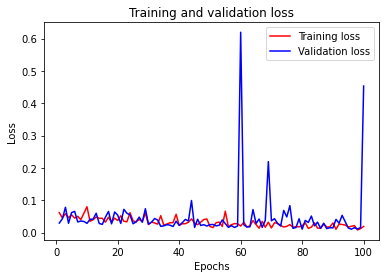

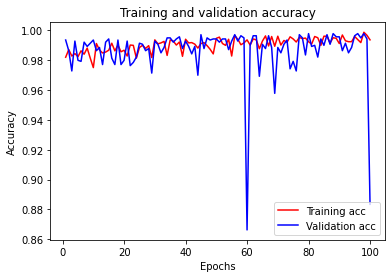

In [36]:
def plot_history(history):
  history_dict = history.history
  keys=list(history_dict.keys())
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'r', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

  plt.plot(epochs, acc, 'r', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

  plt.show()

plot_history(history)

